# Linear Regression

## Motivation: Predicting housing prices
* Let’s say we only know the average number of rooms in an area
* Aim is to predict the prize for a house in that area

## The Formal Regression Problem
Given a dataset of N instances, each instance consisting of:
* A feature vector $x_{i} \in \mathbb{R}^{D}$ are D-dimensional vectors $ \forall i \in \{1, . . ., N\}$
* Target is $y_{i} \in \mathbb{R}$ uni-dimensional $ \forall i \in \{1, . . . , N\}$

__Objective__: Find a prediction model $\hat{y} := f: \mathbb{R}^{D} → \mathbb{R}$ that estimates $y$ by
minimizing a loss $J : \mathbb{R} × \mathbb{R} → \mathbb{R}_{+}$:

$$
\Large \text{$\arg\min_f \sum_{i=1}^N J(y_{i}, f(x_{i})) $}
$$

__Refined Objective__: Find a parametric model $\hat{y} := f: \mathbb{R}^{D} × W → \mathbb{R}$

$$
\Large \text{$\arg\min_w \sum_{i=1}^N J(y_{i}, f(x_{i}; w)) $}
$$

The simplest regression model is the linear regression

$$
\Large \text{$f(x_{i}; w) = w_{0} + w_{1}x_{i,1} + ... + w_{D}x_{D,N} = w_{0} + x_{i}w^{T}$}
$$

## Characteristics:

* Linear function of the weights/parameters $w \in \mathbb{R}^{D+1}$

* Linear function of the input dimensions / variables $x \in \mathbb{R}^{D+1}$



In [1]:
# Import dependancies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load data
df = pd.read_csv('BostonHousingDataset.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
# Dimensions of the Dataset
print(df.shape)

(506, 14)


In [4]:
# Remove MEDV outliers (MEDV=50.0)
df = df[~(df['MEDV'] >= 50.0)]

In [5]:
# RM - average number of rooms per dwelling
rm = df['RM']
rm.head()

0    6.575
1    6.421
2    7.185
3    6.998
4    7.147
Name: RM, dtype: float64

In [6]:
# Summarize the data to see the distribution of RM
rm.describe()

count    490.000000
mean       6.245471
std        0.653147
min        3.561000
25%        5.881000
50%        6.185000
75%        6.578000
max        8.780000
Name: RM, dtype: float64

In [7]:
# MEDV - Median value of owner-occupied homes in $1000's
medv = df['MEDV']
medv.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [8]:
# Summarize the data to see the distribution of MEDV
medv.describe()

count    490.000000
mean      21.635918
std        7.865301
min        5.000000
25%       16.700000
50%       20.900000
75%       24.675000
max       48.800000
Name: MEDV, dtype: float64

In [9]:
# Feature/target extraction
X = np.array(rm)
y = np.array(medv)
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (490,)
Shape of y: (490,)


In [10]:
# Reshape features
X_reshape = X.reshape(-1, 1)
print(f"Shape of X_reshape: {X_reshape.shape}")

Shape of X_reshape: (490, 1)


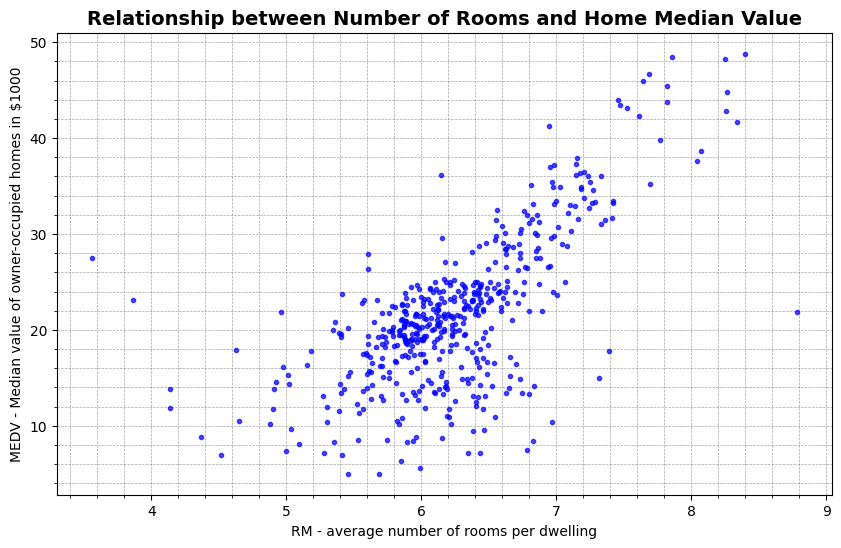

In [11]:
# Plotting data
plt.figure(figsize=(10, 6))
plt.title('Relationship between Number of Rooms and Home Median Value', fontsize=14, fontweight='bold')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.minorticks_on()
plt.plot(X, y, 'o', color='blue', markersize=3, alpha=0.7)
plt.xlabel('RM - average number of rooms per dwelling')
plt.ylabel('MEDV - Median value of owner-occupied homes in $1000')
plt.show()

### Lets use Scipy for linear regression, we want to achive the same result by hand

In [12]:
from scipy import stats
fit_cheat = stats.linregress(X, y)
m = fit_cheat.slope
b = fit_cheat.intercept
w = np.array([b, m])

In [13]:
# Resulting Weight vector
print(w)

[-30.00512015   8.26855732]


In [14]:
def model(x: np.array, m: float, b: float) -> float:
    return m * x + b

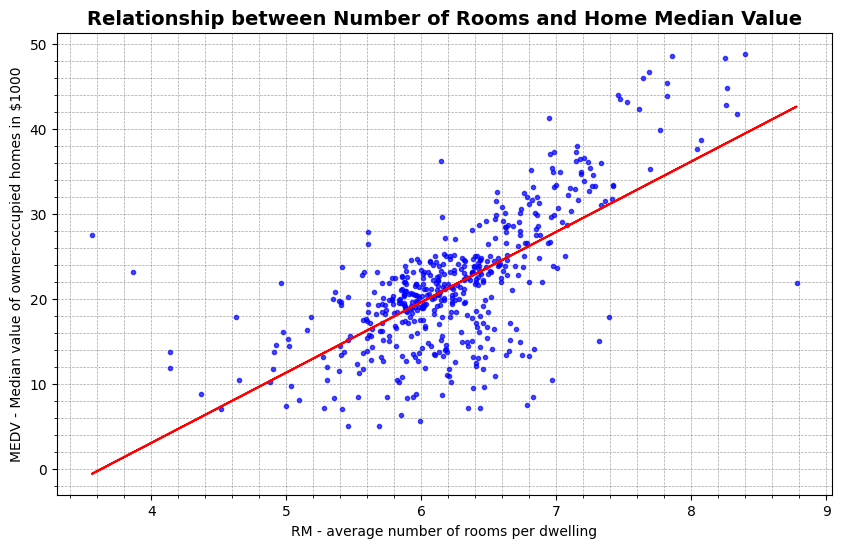

In [15]:
# Plotting with cheat
plt.figure(figsize=(10, 6))
plt.title('Relationship between Number of Rooms and Home Median Value', fontsize=14, fontweight='bold')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.minorticks_on()
plt.plot(X, y, 'o', color='blue', markersize=3, alpha=0.7)
plt.plot(X, model(X, m=m, b=b), 'r', label='fitted line')
plt.xlabel('RM - average number of rooms per dwelling')
plt.ylabel('MEDV - Median value of owner-occupied homes in $1000')
plt.show()

## Option1: Determine the weights analytically.

### Assumptions for the Analytical Solution

The analytical solution is based on three assumptions. If violated, the model may fail or underperform.

- **A1**: The expected value of the residual errors is zero:  
  $ \forall i \ : \ E(\epsilon_i) = 0 $

- **A2**: The residual errors are uncorrelated and share the same variance:  
  $ \forall i \ : \ \text{Var}(\epsilon_i) = \sigma^2 $

- **A3**: The residual errors follow a normal distribution:  
  $ \epsilon_i \sim N(0, \sigma^2) $

---

Assuming the slightly more elegant formulation for linear regression (in augmented vector notation):

$$ 
\Large \text{$ \mathbf{y} = \mathbf{Xw} + \mathbf{\epsilon} $}
$$

We would like to minimize the squared error of the model:

$$
\Large \text{$ \arg \min_{\mathbf{w}} \| \mathbf{\epsilon} \|^2 = \arg \min_{\mathbf{w}} \| \mathbf{y} - \mathbf{Xw} \|^2 = \arg \min_{\mathbf{w}} (\mathbf{y} - \mathbf{Xw})^T (\mathbf{y} - \mathbf{Xw}) $}
$$

---

### Optimization of $w$ via Least Squares Loss Function

$(\mathbf{y} - \mathbf{Xw})^{T} (\mathbf{y} - \mathbf{Xw}) = \mathbf{y}^{T} \mathbf{y} - (\mathbf{Xw})^{T} \mathbf{y} - \mathbf{y}^{T} \mathbf{Xw} + (\mathbf{Xw})^{T} \mathbf{Xw}$

$\Rightarrow - (\mathbf{Xw})^{T} \mathbf{y} - \mathbf{y}^{T} \mathbf{Xw} + (\mathbf{Xw})^{T} \mathbf{Xw}$

$\Rightarrow - \mathbf{w}^{T} \mathbf{X}^{T} \mathbf{y} - \mathbf{y}^{T} \mathbf{Xw} + \mathbf{w}^{T} \mathbf{X}^{T} \mathbf{Xw}$

$\Rightarrow - \mathbf{w}^{T} \mathbf{X}^{T} \mathbf{y} - \mathbf{y}^{T} \mathbf{Xw} + \mathbf{w}^{T} \mathbf{X}^{T} \mathbf{Xw}$

$\Rightarrow - 2 \mathbf{w}^{T} \mathbf{X}^{T} \mathbf{y} + \mathbf{w}^{T} \mathbf{X}^{T} \mathbf{Xw}$


$\arg \min_{\mathbf{w}} \left( -2 \mathbf{y}^T \mathbf{Xw} + \mathbf{w}^T \mathbf{X}^T \mathbf{Xw} \right)$

---

Find optimum by setting the partial derivatives with respect to $w$ to zero:

$0 = \frac{\partial}{\partial \mathbf{w}} \left( -2 \mathbf{y}^T \mathbf{Xw} + \mathbf{w}^T \mathbf{X}^T \mathbf{Xw} \right)$

Use the identity $\frac{\partial}{\partial \mathbf{w}} \mathbf{w}^T \mathbf{A} \mathbf{w} = \mathbf{w}^T (\mathbf{A} + \mathbf{A}^T)$ to derive:

$0 = -2 \mathbf{y}^T \mathbf{X} + \mathbf{w}^T (\mathbf{X}^T \mathbf{X} + (\mathbf{X}^T \mathbf{X})^T)$

$= -2 \mathbf{y}^T \mathbf{X} + 2 \mathbf{w}^T \mathbf{X}^T \mathbf{X}$

$\iff \mathbf{y}^T \mathbf{X} = (\mathbf{w}^T \mathbf{X}^T) \mathbf{X}$

$\iff \mathbf{X}^T \mathbf{y} = \mathbf{X}^T \mathbf{X} \mathbf{w}$

$\iff (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y} = \mathbf{w}$

---

This delivers the analytical solution:

$\mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$

In [16]:
# Add intercept term to X_reshape for calculating b
X_b = np.c_[np.ones((X_reshape.shape[0], 1)), X_reshape]
print(f"Shape of X_b: {X_b.shape}")

Shape of X_b: (490, 2)


In [17]:
# Analytical solution to linear regression (Normal Equation)
w = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
b, m = w

In [18]:
# Resulting Weight vector
print(w)

[-30.00512015   8.26855732]


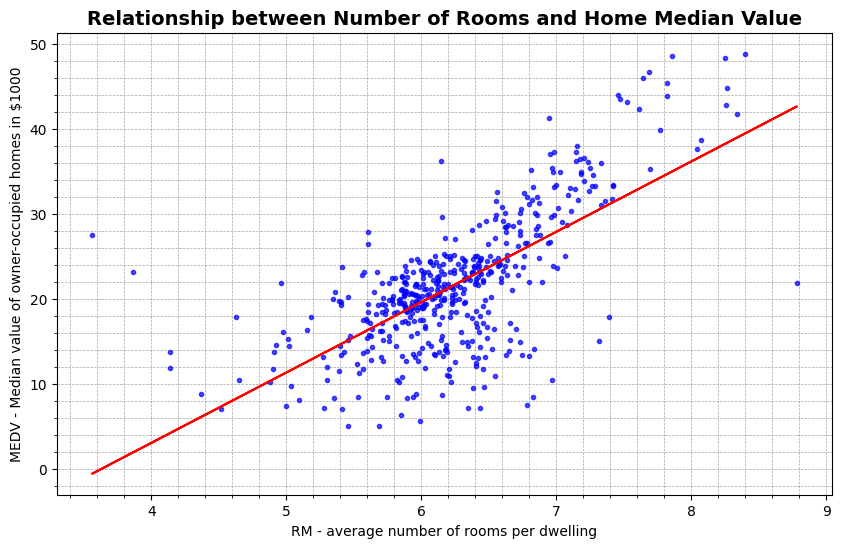

In [19]:
plt.figure(figsize=(10, 6))
plt.title('Relationship between Number of Rooms and Home Median Value', fontsize=14, fontweight='bold')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.minorticks_on()
plt.plot(X, y, 'o', color='blue', markersize=3, alpha=0.7)
plt.plot(X, model(X, m=m, b=b), 'r', label='fitted line')
plt.xlabel('RM - average number of rooms per dwelling')
plt.ylabel('MEDV - Median value of owner-occupied homes in $1000')
plt.show()

## Option2: Guess The Entries Of w And Try To Improve Them Iteratively

The gradient of the cost function $J(\mathbf{w})$ with respect to $\mathbf{w}$ is:

$$ 
\Large \text{$ \frac{\partial J(\mathbf{w})}{\partial \mathbf{w}} = \frac{\partial}{\partial \mathbf{w}} \left( \sum_{i=1}^{N} (y_i - f(\mathbf{x}_i; \mathbf{w}))^2 \right) $}
$$


This simplifies to:
$$
\Large \text{$ \frac{\partial J(\mathbf{w})}{\partial \mathbf{w}} = \sum_{i=1}^{N} -2 (y_i - f(\mathbf{x}_i; \mathbf{w})) \mathbf{x}_i $}


In [20]:
def gradient_descent(X: np.array, y: np.array, eps: float, max_iter: int, verbose: bool=False) -> np.array:
    w = np.random.rand(2)
    N = X.shape[0]
    for iter in range(max_iter):
        y_hat = np.dot(X, w)                        # (490 x 2) * (2,) = (490,)
        J_w = -2 * np.dot((y - y_hat), X) / N       # (490,) * (490 x 2) = (2,)
        w = w - eps * J_w                           # (2,)

        if verbose: 
            if iter % 1000 == 0:
                loss = np.mean((y - y_hat)**2) 
                print(f"Iter: {iter}, Loss: {loss}")
    return w

In [21]:
w_star = gradient_descent(X_b, y, eps=0.024, max_iter=10000, verbose=True)

Iter: 0, Loss: 281.84347080329024
Iter: 1000, Loss: 36.35476372771957
Iter: 2000, Loss: 33.98472108374002
Iter: 3000, Loss: 33.12268378630674
Iter: 4000, Loss: 32.809141621125136
Iter: 5000, Loss: 32.69509935214271
Iter: 6000, Loss: 32.65361963885717
Iter: 7000, Loss: 32.638532543260055
Iter: 8000, Loss: 32.633045030557405
Iter: 9000, Loss: 32.63104909996441


In [22]:
# Resulting Weight vector
print(w_star)

[-29.80906747   8.23749677]


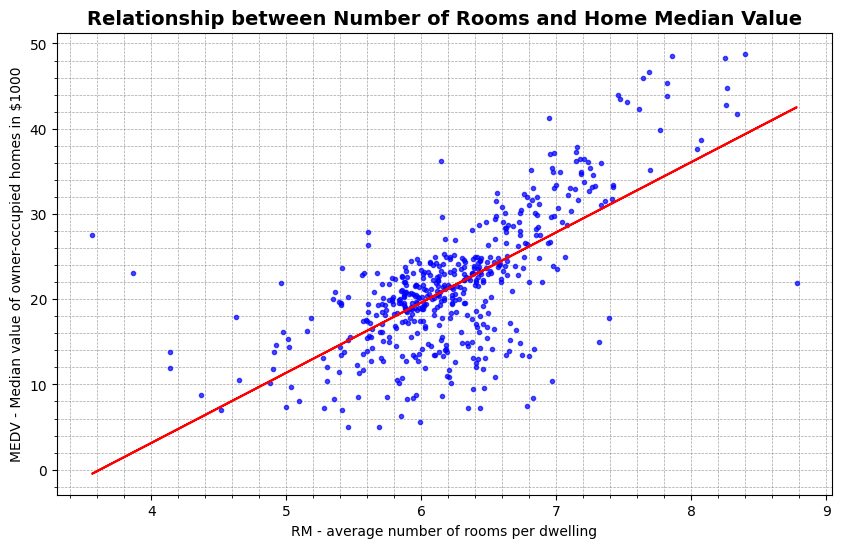

In [23]:
b, m = w_star
plt.figure(figsize=(10, 6))
plt.title('Relationship between Number of Rooms and Home Median Value', fontsize=14, fontweight='bold')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.minorticks_on()
plt.plot(X, y, 'o', color='blue', markersize=3, alpha=0.7)
plt.plot(X, model(X, m=m, b=b), 'r', label='fitted line')
plt.xlabel('RM - average number of rooms per dwelling')
plt.ylabel('MEDV - Median value of owner-occupied homes in $1000')
plt.show()